In [1]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from scipy.stats import norm

In [2]:
df=pd.read_csv('Sanova.csv',error_bad_lines=False,encoding='latin-1',sep=';',usecols=[25,26,27,28,29])
df.sample(5)

,NUMERO_ECONOMIAS_RES,NUMERO_ECONOMIAS_COM,NUMERO_ECONOMIAS_IND,NUMERO_ECONOMIAS_PUB,VOLUME_LIDO
1033,1.0,NaN,NaN,NaN,18.0
777,1.0,NaN,NaN,NaN,24.0
344,1.0,NaN,NaN,NaN,NaN
291,1.0,NaN,NaN,NaN,16.0
812,1.0,NaN,NaN,NaN,NaN


,NUMERO_ECONOMIAS_RES,NUMERO_ECONOMIAS_COM,NUMERO_ECONOMIAS_IND,NUMERO_ECONOMIAS_PUB,VOLUME_LIDO
1033,1.0,NaN,NaN,NaN,18.0
777,1.0,NaN,NaN,NaN,24.0
344,1.0,NaN,NaN,NaN,NaN
291,1.0,NaN,NaN,NaN,16.0
812,1.0,NaN,NaN,NaN,NaN


In [3]:
#limpandos os dados,substituindo Nan por 0
df["NUMERO_ECONOMIAS_RES"] = df["NUMERO_ECONOMIAS_RES"].fillna(0)
df["NUMERO_ECONOMIAS_COM"] = df["NUMERO_ECONOMIAS_COM"].fillna(0)
df["NUMERO_ECONOMIAS_IND"] = df["NUMERO_ECONOMIAS_IND"].fillna(0)
df["NUMERO_ECONOMIAS_PUB"] = df["NUMERO_ECONOMIAS_PUB"].fillna(0)
df["VOLUME_LIDO"] = df["VOLUME_LIDO"].fillna(0)
#criando novo coluna com o somatorio de todas as economias
df['economias_tot']=df['NUMERO_ECONOMIAS_RES']+df['NUMERO_ECONOMIAS_COM']+df['NUMERO_ECONOMIAS_IND']+df['NUMERO_ECONOMIAS_PUB']

In [4]:
df_novo=df[df['economias_tot']!=0]
df_novo=df_novo[df_novo['VOLUME_LIDO']!=0]
df_novo=df_novo[df_novo['NUMERO_ECONOMIAS_COM']==0]
df_novo=df_novo[df_novo['NUMERO_ECONOMIAS_IND']==0]
df_novo=df_novo[df_novo['NUMERO_ECONOMIAS_PUB']==0]
df_novo.nlargest(5,'NUMERO_ECONOMIAS_RES')
#df_novo é um data frame onde os valores da economia total e volume lido sao diferentes de 0

,NUMERO_ECONOMIAS_RES,NUMERO_ECONOMIAS_COM,NUMERO_ECONOMIAS_IND,NUMERO_ECONOMIAS_PUB,VOLUME_LIDO,economias_tot
445,67.0,0.0,0.0,0.0,424.0,67.0
1102,50.0,0.0,0.0,0.0,353.0,50.0
1062,46.0,0.0,0.0,0.0,470.0,46.0
37,40.0,0.0,0.0,0.0,303.0,40.0
977,40.0,0.0,0.0,0.0,278.0,40.0


,NUMERO_ECONOMIAS_RES,NUMERO_ECONOMIAS_COM,NUMERO_ECONOMIAS_IND,NUMERO_ECONOMIAS_PUB,VOLUME_LIDO,economias_tot
445,67.0,0.0,0.0,0.0,424.0,67.0
1102,50.0,0.0,0.0,0.0,353.0,50.0
1062,46.0,0.0,0.0,0.0,470.0,46.0
37,40.0,0.0,0.0,0.0,303.0,40.0
977,40.0,0.0,0.0,0.0,278.0,40.0


In [5]:
df_novo.nlargest(5,'VOLUME_LIDO')

,NUMERO_ECONOMIAS_RES,NUMERO_ECONOMIAS_COM,NUMERO_ECONOMIAS_IND,NUMERO_ECONOMIAS_PUB,VOLUME_LIDO,economias_tot
1018,30.0,0.0,0.0,0.0,634.0,30.0
1062,46.0,0.0,0.0,0.0,470.0,46.0
445,67.0,0.0,0.0,0.0,424.0,67.0
1144,34.0,0.0,0.0,0.0,413.0,34.0
716,24.0,0.0,0.0,0.0,410.0,24.0


,NUMERO_ECONOMIAS_RES,NUMERO_ECONOMIAS_COM,NUMERO_ECONOMIAS_IND,NUMERO_ECONOMIAS_PUB,VOLUME_LIDO,economias_tot
1018,30.0,0.0,0.0,0.0,634.0,30.0
1062,46.0,0.0,0.0,0.0,470.0,46.0
445,67.0,0.0,0.0,0.0,424.0,67.0
1144,34.0,0.0,0.0,0.0,413.0,34.0
716,24.0,0.0,0.0,0.0,410.0,24.0


In [6]:
x=df_novo['NUMERO_ECONOMIAS_RES'].values
y=df_novo['VOLUME_LIDO'].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)
#correlação 86%

Text(0.5, 1.0, 'Volume lido em relação a Nº economias residenciais')

Text(0.5, 1.0, 'Volume lido em relação a Nº economias residenciais')

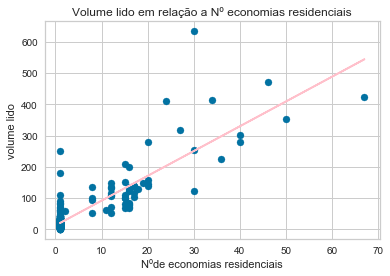

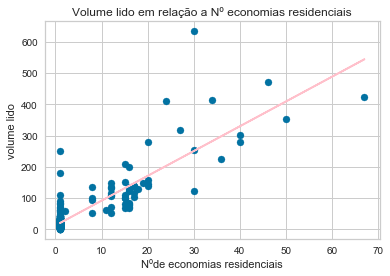

In [7]:
plt.scatter(x,y)
modelo=LinearRegression()
modelo.fit(x,y)
plt.plot(x,modelo.predict(x),color='Pink')
plt.xlabel('Nºde economias residenciais')
plt.ylabel('volume lido')
plt.title('Volume lido em relação a Nº economias residenciais')

In [8]:
modelo.intercept_#intercepctação
modelo.coef_#inclinação

array([[7.94043072]])

array([[7.94043072]])

In [9]:
equação=modelo.intercept_+modelo.coef_*12
equação

array([[107.42407223]])

array([[107.42407223]])

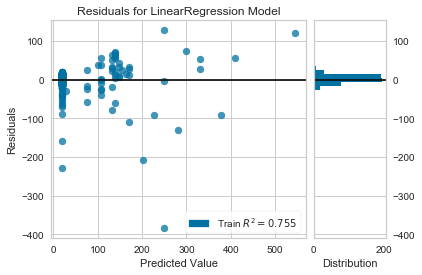

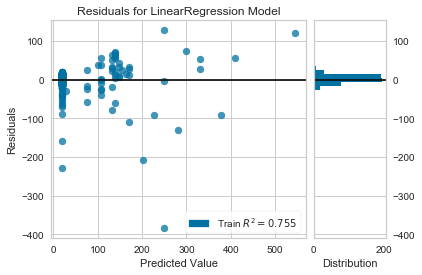

In [10]:
#residuos
modelo._residues
visualizador=ResidualsPlot(modelo)
visualizador.fit(x,y)
visualizador.poof()